In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

# Example: Generate synthetic data
n_samples = 100
X = torch.randn(n_samples, 1)  # One feature
true_weights = torch.tensor([[0.8]])
true_bias = torch.tensor([0.5])

# Compute Poisson rates λ = exp(Xw + b)
lambda_true = torch.exp(X @ true_weights + true_bias)
y = torch.poisson(lambda_true)  # Sample from Poisson distribution


In [3]:
class PoissonRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Simple linear model
    
    def forward(self, x):
        return torch.exp(self.linear(x))  # Output λ = exp(xw + b)

In [4]:
model = PoissonRegression()
criterion = nn.PoissonNLLLoss(log_input=False)  # log_input=False because we output λ directly
optimizer = optim.Adam(model.parameters(), lr=0.05)

losses = []
for epoch in range(500):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.0924
Epoch 100, Loss: -0.0818
Epoch 200, Loss: -0.0818
Epoch 300, Loss: -0.0818
Epoch 400, Loss: -0.0818


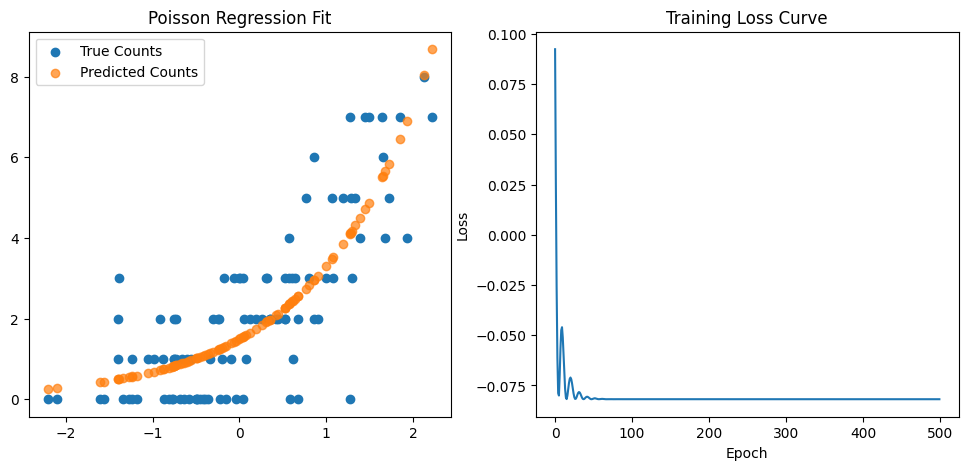

In [5]:
# Plot predicted vs actual
with torch.no_grad():
    y_pred = model(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.numpy(), y.numpy(), label="True Counts")
plt.scatter(X.numpy(), y_pred.numpy(), label="Predicted Counts", alpha=0.7)
plt.legend()
plt.title("Poisson Regression Fit")

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
